### Poisson equation example

The generalized form of the equations solved in this package looks like, 
    $$ \alpha \frac{\partial \varphi}{\partial t} + \nabla\cdot\left(\vec{u}\varphi\right) + \nabla\cdot\left(-D\nabla\varphi\right) + \beta \varphi = \gamma $$

with boundary condition,
    $$ a\nabla\varphi\cdot \vec{e} + b\varphi = c $$.


The inhomogeneous Poisson equation
    $$ \nabla^2 \varphi + s\left(\vec{x}\right) = 0 $$

can be generalized to a simple 1D case,

\begin{align}
    \frac{\partial^2 \varphi}{\partial ^2 x}  + s\left(x\right) &= 0 \\
    \varphi\left(x_L\right) &= 0 \\
    \frac{\partial \varphi}{\partial x}|_{x_R} &= 0
\end{align}    

The corresponding equation in our form has 
\begin{align}
    D = 1.0, \vec{u} &= \vec{0}  \\
    \alpha = 0, \beta = 0, \gamma &= s  \\
    a_L = 0, b_L = 1, c_L &= 0 \\
    a_R = 1, b_R = 0, c_R &= 0 \\    
\end{align}

see this link
http://scicomp.stackexchange.com/questions/8577/peculiar-error-when-solving-the-poisson-equation-on-a-non-uniform-mesh-1d-only

Strange behavior when change the number of grids from even to odd
Wrong results does not always mean that the code has bugs.

Wrong use of the code can also give you wrong results

 Written by Ali A. Eftekhari
 Last checked: June 2021
 
 Ported to python by Gavin M. Weir June, 2023


In [1]:
# Enable interactive plotting
%matplotlib notebook   

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyfvtool.mesh import createMesh1D
from pyfvtool.cell import cellLocations, createCellVariable
from pyfvtool.face import faceLocations, createFaceVariable
from pyfvtool.boundary import createBC
from pyfvtool.diffusion import diffusionTerm
from pyfvtool.source import constantSourceTerm
from pyfvtool.boundary import boundaryCondition
from pyfvtool.pdesolver import solvePDE
from pyfvtool.visualization import visualizeCells

<IPython.core.display.Javascript object>


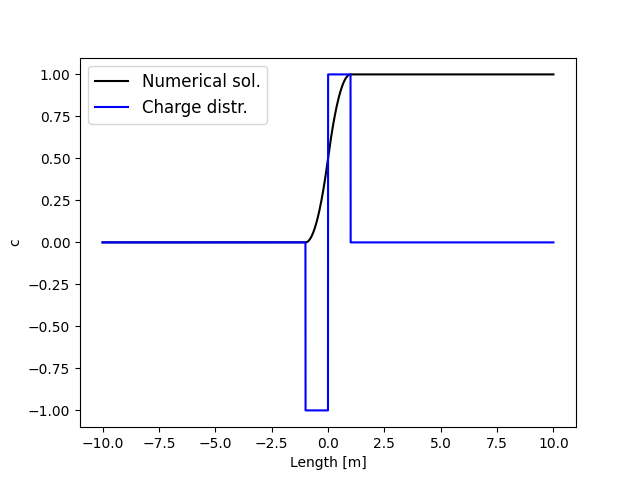

In [9]:
# Define the domain and create a mesh structure
L = 20      # domain length
Nx = 10000  # number of cells
m = createMesh1D(Nx, L)

# Create the boundary condition structure
BC = createBC(m)  # Neumann boundary conditions 

# left-boundary:
BC.left.a = 0.0
BC.left.b = 1.0
BC.left.c = 0.0

# right-boundary (Neumann is the default in this package)
BC.right.a = 1.00 
BC.right.b = 0.0 
BC.right.c = 0.0

x = m.cellcenters.x-0.5*L; # shift the domain to [-10,10]

# define the transfer coeffs
D_val = 1;
D = createFaceVariable(m, D_val);

# define source term
def rho(x):
    # rho = @(x)(-1.0*((x>=-1.0)&(x<=0))+((x>0)&(x<=1)));
    return -1.0*((x>=-1.0)*(x<=0))+(x>0)*(x<=1)

s1 = constantSourceTerm(createCellVariable(m, rho(x)))
Mdiff = diffusionTerm(D)
Mbc, RHSbc = boundaryCondition(BC)

M = Mdiff + Mbc
RHS = -s1+RHSbc
c = solvePDE(m, M, RHS)

# visualization
plt.figure()
plt.plot(x, c.value[:Nx], 'k-', label='Numerical sol.')
plt.plot(x, rho(x), 'b-', label='Charge distr.')
plt.xlabel('Length [m]')
plt.ylabel('c')
plt.legend(fontsize=12)
